<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [1]:
!pip install --upgrade networkx
!pip3 install --upgrade scipy

  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

node2vec 0.4.6 requires networkx<3.0,>=2.5, but you'll have networkx 3.1 which is incompatible.


Requirement already up-to-date: scipy in c:\users\kyriakos\anacoda\lib\site-packages (1.10.1)


In [2]:
!pip install --upgrade numpy

Requirement already up-to-date: numpy in c:\users\kyriakos\anacoda\lib\site-packages (1.24.4)


In [3]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\kyriakos\anacoda\lib\site-packages (1.3.2)


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler 

%matplotlib notebook

In [5]:
!pip3 install --upgrade node2vec

Requirement already up-to-date: node2vec in c:\users\kyriakos\anacoda\lib\site-packages (0.4.6)
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [6]:
import numpy as np
from node2vec import Node2Vec   
import multiprocessing

Graph with 430 nodes and 565 edges


<IPython.core.display.Javascript object>


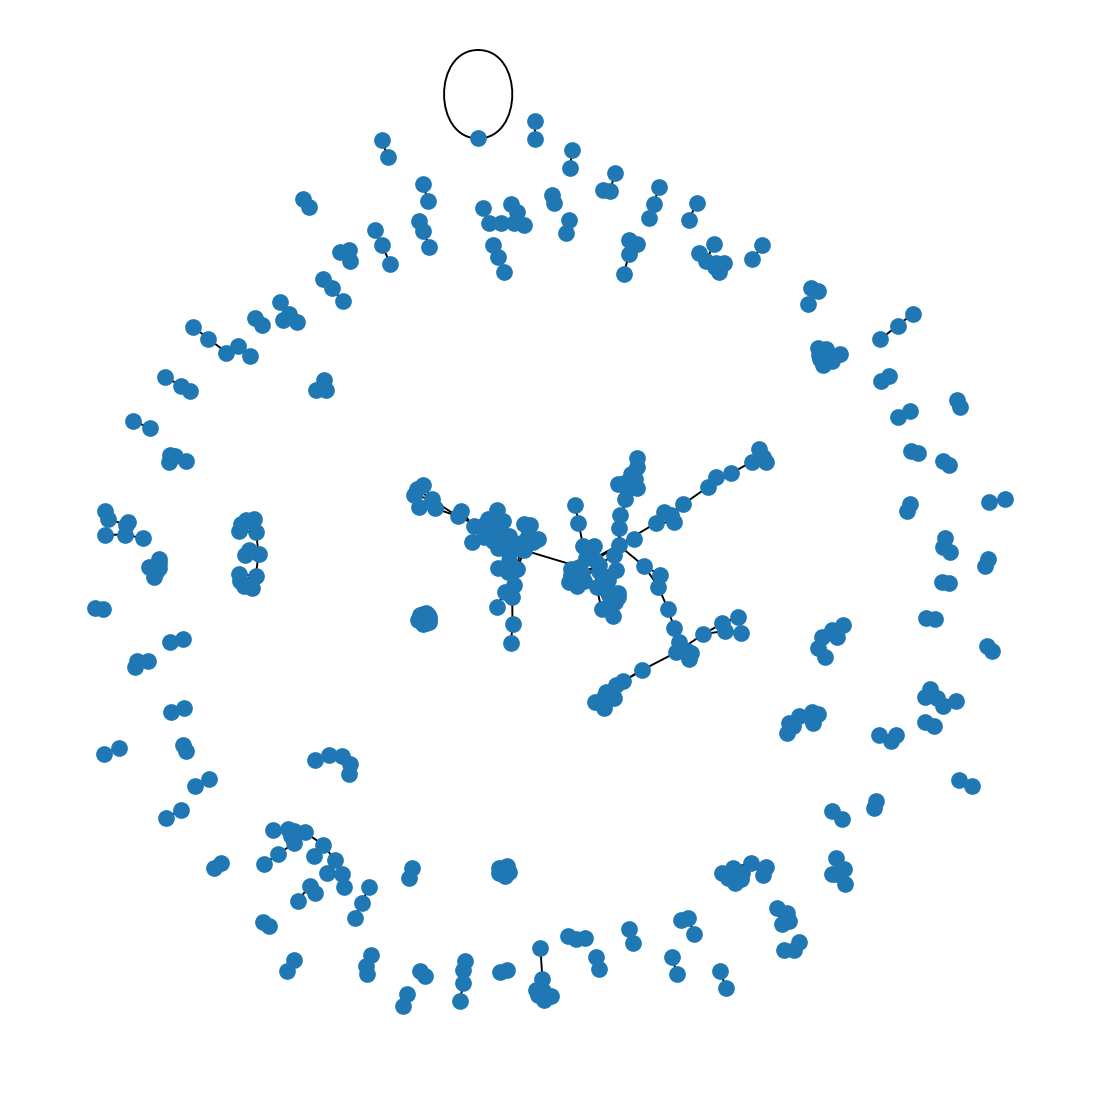

In [7]:
import networkx as nx

file_path = 'C:\\Users\\Kyriakos\\OneDrive\\Desktop\\DATA\\dbpedia-similar\\out.dbpedia-similar'

with open(file_path, 'rb') as edge_file:
    G = nx.read_edgelist(edge_file, nodetype = int, comments = '%')
    print(G)

plt.figure(figsize = (8, 8))  
nx.draw(G,node_size = 60)

<IPython.core.display.Javascript object>


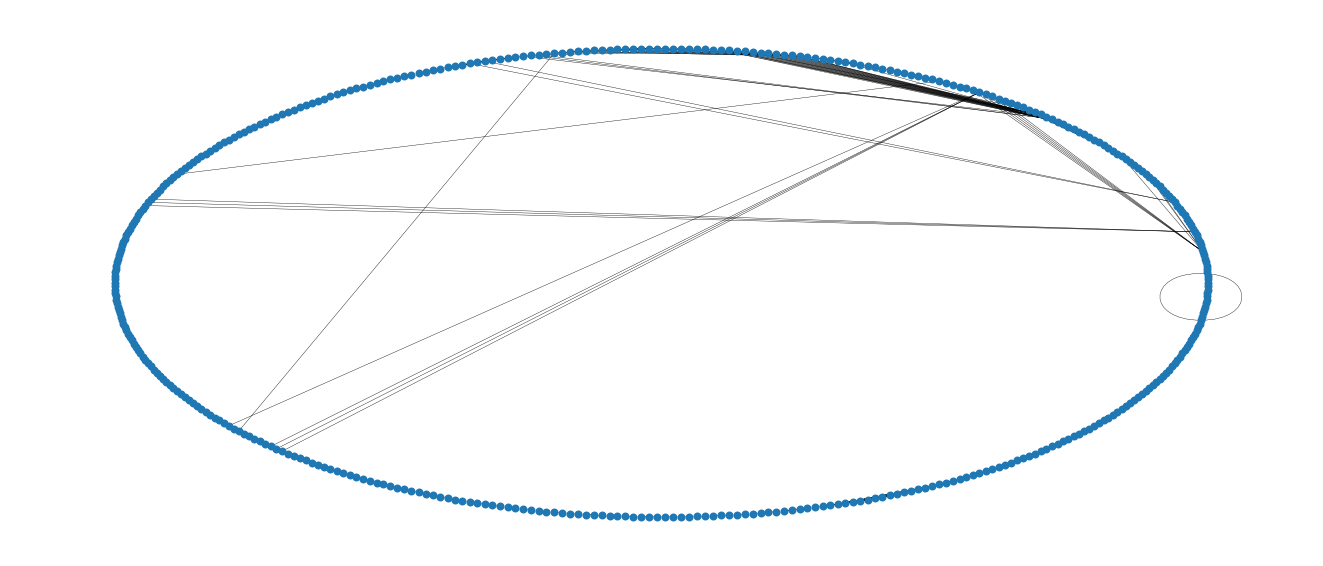

In [8]:
plt.figure(figsize = (7, 3))  
nx.draw_circular(G,node_size = 10, width = .2)

Από την παραπάνω αναπαράσταση εύκολα μπορούμε να παρατηρήσουμε ότι υπάρχει μόνο ένα self loop, το οποίο, όπως μπορούμε να δούμε στην παρακάτω αναπαράσταση, έχει αφαιρεθεί

<IPython.core.display.Javascript object>


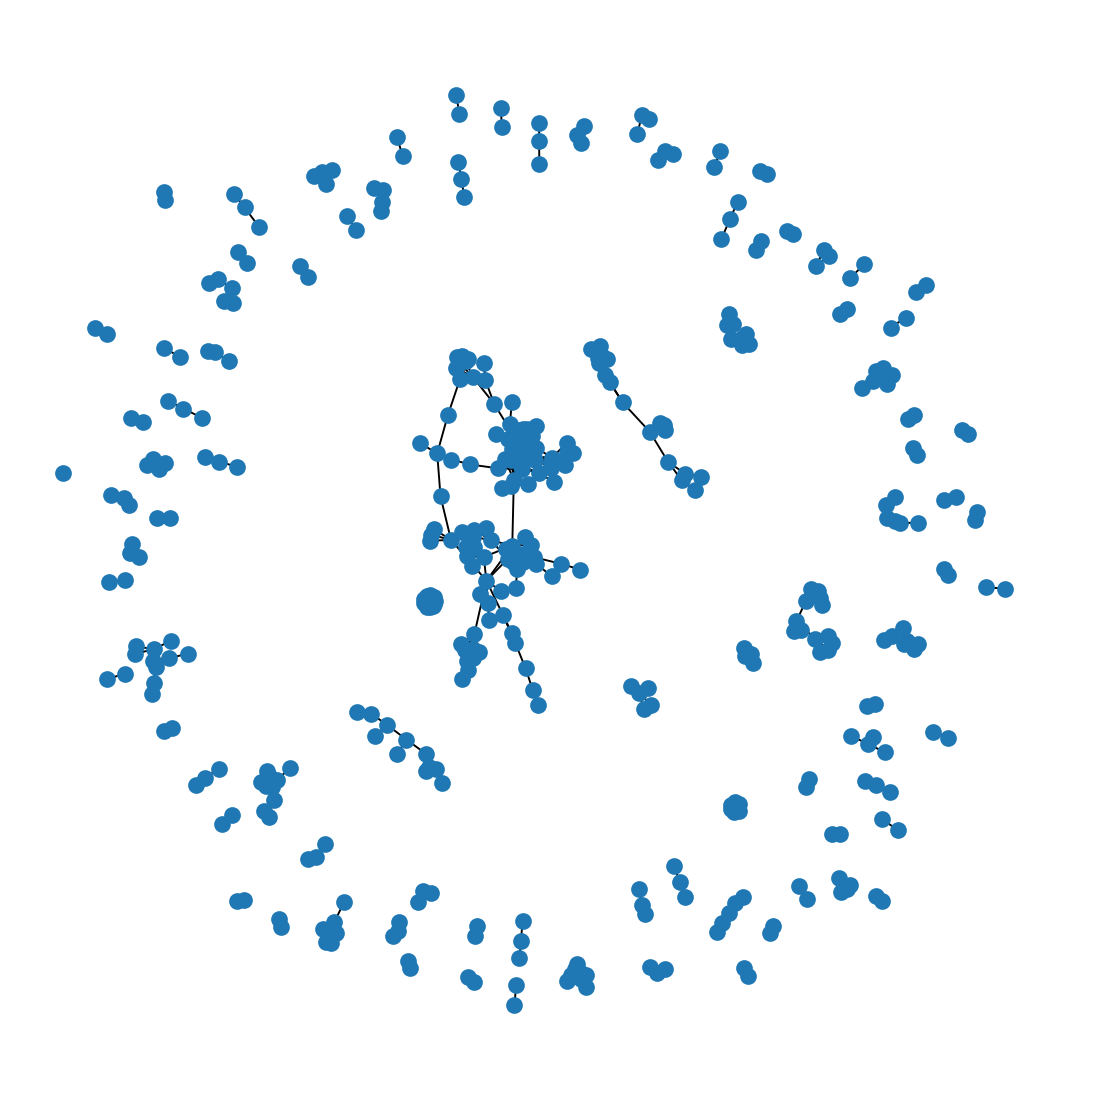

In [9]:
G.remove_edges_from(nx.selfloop_edges(G))

plt.figure(figsize =(8, 8))  
nx.draw(G,node_size = 60)

To dataset δεν είναι δυνατόν να περιέχει διπλότυπα των ακμών καθώς το πακέτο networkx χειρίζεται τις ακμές ως λεξικά, και εξαιτίας της δομής του λεξικού, δεν μπορούν να υπάρχουν διπλότυπα.

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [10]:
initial_node_count = nx.nodes(G)         
initial_edges_count = nx.edges(G)
initial_mean_node_degree = sum([degree for (node,degree) in G.degree])/len(initial_node_count)
initial_connected_components = nx.number_connected_components(G)
print(f"""
initial_node_count = {len(initial_node_count)}
initial_edges_count = {len(initial_edges_count)}
initial_mean_node_degree = {initial_mean_node_degree}
initial_connected_components = {initial_connected_components}
""")


initial_node_count = 430
initial_edges_count = 564
initial_mean_node_degree = 2.6232558139534885
initial_connected_components = 95



Παρατηρούμε ότι ο αριθμός των ακμών μειώθηκε κατά ένα, δηλαδή από 565 σε 564, λόγο της αφαίρεσης του self loop.

<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [11]:
adjacency_matrix = nx.adjacency_matrix(G).toarray()
unconnected_node_pairs = []

for i in range(adjacency_matrix.shape[0]):
    for j in range(i + 1, adjacency_matrix.shape[1]):
        if (adjacency_matrix[i, j] == 0):
            unconnected_node_pairs.append((i + 1, j + 1))

print(f"Unconnected pairs count: {len(unconnected_node_pairs)}")

Unconnected pairs count: 91671


Για να υπολογίσουμε τα unconnected node pairs, διατρέχουμε τον πίνακα γειτνίασης, και κρατάμε εκείνα τα στοιχεία που έχουν τιμή ίση με 0.

<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [12]:
temporary_G = G.copy()
removable_edges = []

for edge in initial_edges_count:
    temporary_G.remove_edge(*edge)
  
    if ((nx.number_connected_components(temporary_G) == initial_connected_components) 
        and (len(nx.nodes(temporary_G)) == len(initial_node_count))):
        removable_edges.append(edge)
    else:
        temporary_G.add_edge(*edge)

print(f"The number of removable edges is:  {len(removable_edges)}")

The number of removable edges is:  229


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [13]:
#dataframe of removable edges (they will function as positive samples)
df_removable_edges = pd.DataFrame(removable_edges, columns = ['start_node', 'end_node'])
df_removable_edges['link'] = 1


#dataframe of unconnected node pairs (they will function as negative samples)
df_unconnected_node_pairs = pd.DataFrame(unconnected_node_pairs, columns = ['start_node', 'end_node'])
df_unconnected_node_pairs['link'] = 0

#merge in one dataframe
frames = [df_removable_edges, df_unconnected_node_pairs]
df = pd.concat(frames)

#build graph G'=G_reduced
G_reduced = temporary_G.copy()

G_reduced_node_count = nx.nodes(G_reduced)         
G_reduced_edges_count = nx.edges(G_reduced)
G_reduced_mean_node_degree = sum([degree for (node,degree) in G_reduced.degree]) / len(G_reduced_node_count)
G_reduced_connected_components = nx.number_connected_components(G_reduced)

print(f"""
G_reduced_node_count = {len(G_reduced_node_count)}
G_reduced_edges_count = {len(G_reduced_edges_count)}
G_reduced_mean_node_degree = {G_reduced_mean_node_degree}
G_reduced_connected_components = {G_reduced_connected_components}
""")


G_reduced_node_count = 430
G_reduced_edges_count = 335
G_reduced_mean_node_degree = 1.558139534883721
G_reduced_connected_components = 95



In [14]:
df

,start_node,end_node,link
0,1,2,1
1,1,3,1
2,1,4,1
3,3,4,1
4,3,5,1
...,...,...,...
91666,426,430,0
91667,427,428,0
91668,427,429,0
91669,427,430,0


Μπορούμε να παρατηρήσουμε ότι ο δείκτης του παραπάνω πίνακα φτάνει μέχρι την τιμή 91670, ενώ έχει shape (91900, 3). Το παραπάνω αποτέλεσμα οφείλεται στο γεγονός πως έχει γίνει concatinate των dataframe: removable_edges και unconnected_node_pairs με το df.removable_edges να είναι πρώτο και το df.unconnected_node_pairs να είναι δεύτερο. Με αποτέλεσμα το τελικό dataframe να ξεκινάει με index 0 εώς 228 και να συνεχίζει με index 0 εώς 91670.

<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [15]:
#2(i)
jcr = nx.jaccard_coefficient(G_reduced)

In [16]:
#2(ii)
k = [[-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1]] 
for u,v,p in jcr:
    if (p > k[0][2]):
        k[0] = (u,v,p)
    elif (p > k[1][2]):
        k[1] = (u,v,p)
    elif(p > k[2][2]):
        k[2] = (u,v,p)
    elif(p > k[3][2]):
        k[3] = (u,v,p)

print("The 4 edges with the greatest Jaccard Coefficient are: {} and {} and {} and {}, with Jaccard Coefficient score of {} and {} and {} and {} respectively.".
      format(k[0][:2], k[1][:2], k[2][:2], k[3][:2], k[0][2], k[1][2], k[2][2], k[3][2]))

The 4 edges with the greatest Jaccard Coefficient are: (4, 46) and (4, 47) and (4, 49) and (23, 34), with Jaccard Coefficient score of 1.0 and 1.0 and 1.0 and 1.0 respectively.


In [17]:
jaccard = [(u, v, p) for u, v, p in nx.jaccard_coefficient(G_reduced)]

<IPython.core.display.Javascript object>


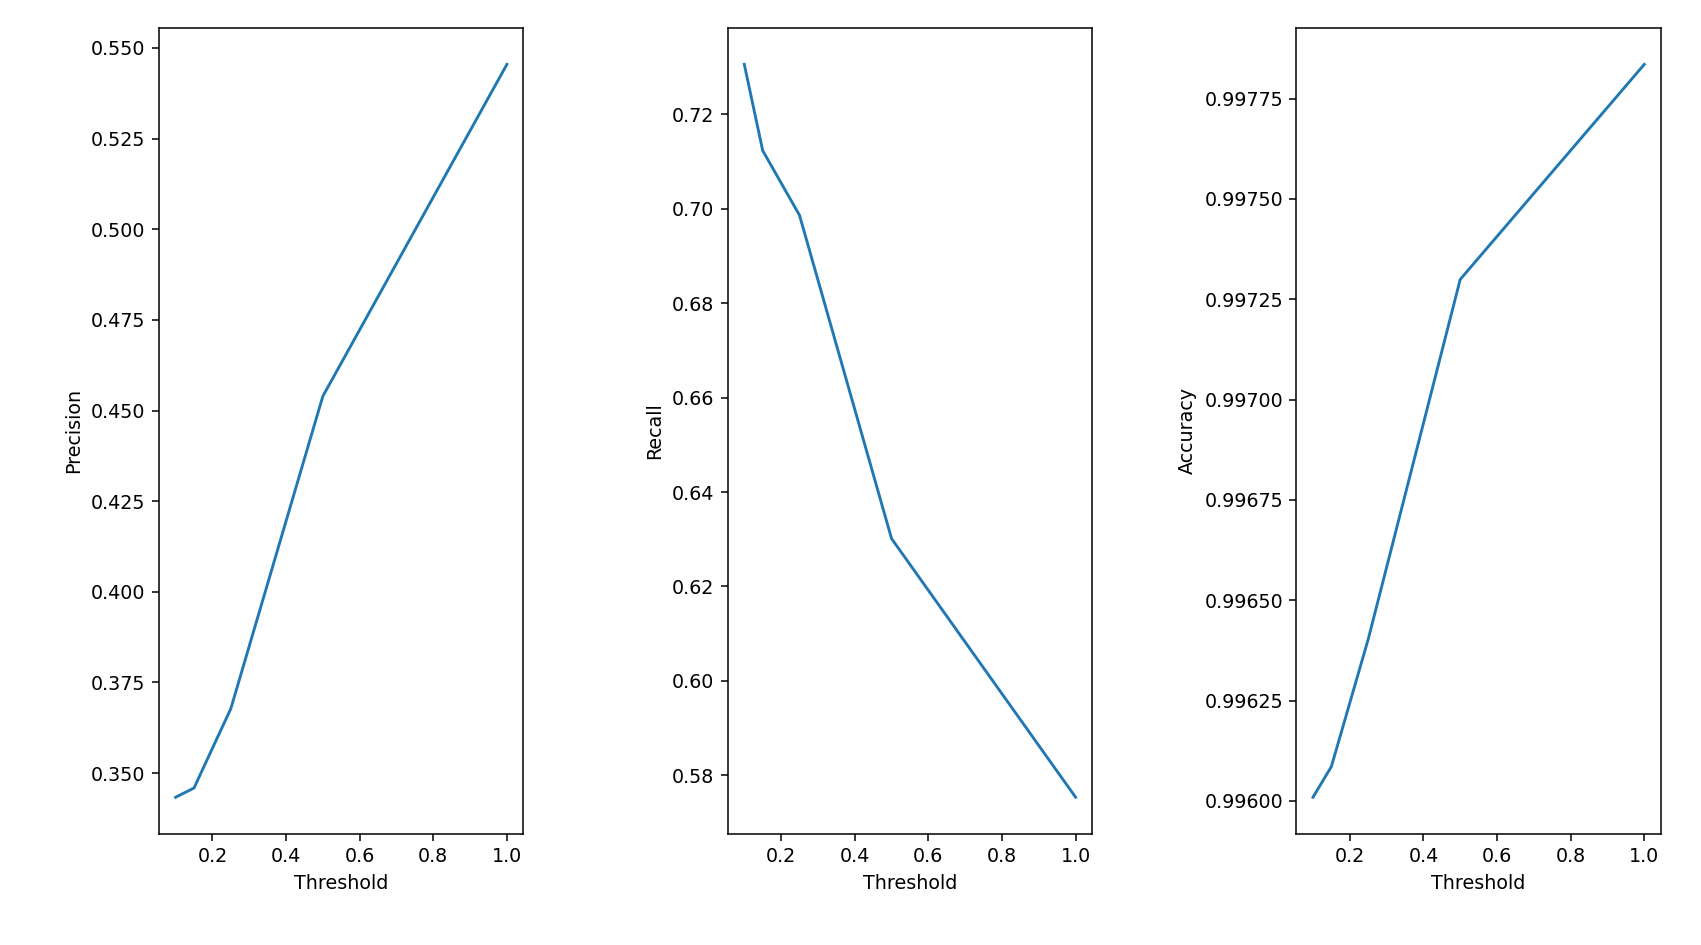

In [18]:
#2(iii)
thresholds = [0.1, 0.15, 0.25, 0.5, 1.0]

def jc_def(threshold):
    TP, FP, FN, TN = 0,0,0,0
    
    for edge in jaccard:
        from_node, to_node, jc = edge

        if (jc >= threshold):
            if (from_node, to_node) in removable_edges:
                TP += 1
            elif (from_node, to_node) in unconnected_node_pairs:
                FP += 1

        elif (jc < threshold):
            if ((from_node, to_node) in removable_edges):
                FN += 1
            elif ((from_node, to_node) in unconnected_node_pairs):
                TN += 1
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + FP + FN + TN)

    return precision, recall, accuracy

precisions = []
recalls = []
accuracies = []

for threshold in thresholds:
    precision, recall, accuracy = jc_def(threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 5))
data = zip([ax1, ax2, ax3],
           [precisions, recalls, accuracies],
           ['Precision', 'Recall', 'Accuracy'])

for ax, metric, title in data:
    ax.plot(thresholds, metric)
    ax.set_xlabel('Threshold')
    ax.set_ylabel(title)
plt.tight_layout()
plt.show()

Σημειώνουμε πώς για κάθε διακριτικό όριο, το accuracy παραμένει υψηλό, σχεδόν ισοπεδωτική με την κυριότερη κλάση του συνόλου δεδομένων, σχεδόν ισοπεδωτική με την κυριότερη κλάση του συνόλου δεδομένων, ενώ τα precision και recall είναι σαφώς χαμηλότερα. Καθώς αυξάνεται το threshold, το accuracy αυξάνεται, ενώ το recall μειώνεται. Η πλειοψηφία του συνόλου δεδομένων αναγνωρίζεται ως True Negative και αυτό εξηγεί την πολύ υψηλή τιμή του accuracy. Τέλος, παρατηρούμε σταθερά περισσότερα False Positives από τα True Positives. Επομένως, μπορούμε να συμπεράνουμε πώς η επίδοση του link prediction μέσω της Jaccard Coefficient δεν είναι βέλτιστη λόγω των χαμηλών επιδόσεων στις τιμές precision και recall.

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

Η συσχέτιση μεταξύ των τιμών των μετρικών Jaccard Coefficient, Preferential Attachment, Resource Allocation για τον μειωμένο γράφο G' μπορεί να μελετηθεί με την χρήση των Pearson και Spearman correlations. Και στις δύο μεθόδους υπολογίζουμε τα αποτελέσματα και για τις τρεις μετρικές και εν συνεχεία, χρησιμοποιώντας το πακέτο scipy, εισάγουμε την εκάστοτε συνάρτηση και υπολογίζουμε την συσχέτιση των αποτελεσμάτων της κάθε μίας με τα δεδομένα του G_reduced. Αν δεν υπάρχει επίγνωση για την κατανομή ή την σχέση μεταξύ των μεταβλητών που συγκρίνουμε, η Spearman correlation αποτελεί καλύτερη επιλογή.

In [19]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
df_copy = df.copy()
#create new 'edge' column were values of type (a,b) are stored and set it as index
df_copy.insert(0, "edge", 0)
df_copy["edge"] = "(" + df_copy['start_node'].astype(str) + "," + df_copy['end_node'].astype(str) + ")"
df_copy.set_index('edge', inplace = True)

In [20]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient
jaccard_coefficient = [p for u, v, p in nx.jaccard_coefficient(G_reduced)]
#Preferential Attachment
preferential_attachment = [p for u, v, p in nx.preferential_attachment(G_reduced)]
#Resource Allocation
resource_allocation = [p for u, v, p in nx.resource_allocation_index(G_reduced)]

df_copy = df_copy.assign(jaccard_coefficient = jaccard_coefficient, preferential_attachment = preferential_attachment, resource_allocation = resource_allocation)

In [21]:
df_copy

,start_node,end_node,link,jaccard_coefficient,preferential_attachment,resource_allocation
edge,,,,,,
"(1,2)",1,2,1,0.0,1,0.0
"(1,3)",1,3,1,0.0,2,0.0
"(1,4)",1,4,1,0.0,1,0.0
"(3,4)",3,4,1,0.0,7,0.0
"(3,5)",3,5,1,0.0,1,0.0
...,...,...,...,...,...,...
"(426,430)",426,430,0,0.0,1,0.0
"(427,428)",427,428,0,0.0,2,0.0
"(427,429)",427,429,0,0.0,1,0.0


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [22]:
#uncomment whole cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
X = df_copy[['jaccard_coefficient', 'preferential_attachment', 'resource_allocation']]
y = df_copy['link']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [23]:
#uncomment whole cell
classifier = RandomForestClassifier() 

from sklearn.preprocessing import MinMaxScaler 
  

mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}

model = GridSearchCV(classifier, param_grid = parameters) 

In [24]:
model.fit(X_train_scaled, y_train)#train the model

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [30]:
predictions = model.predict(X_test_scaled)       #uncomment
print(f"The first 4 predictions of the model are: {predictions[:4]}")
print(f"The first 4 labels of our test set to check the accuracy of the above predictions {y_test.head(4)}")
acc = accuracy_score(y_test, predictions)
print(f"The model's accuracy is {acc}")

The first 4 predictions of the model are: [0 0 0 0]
The first 4 labels of our test set to check the accuracy of the above predictions edge
(94,372)     0
(131,204)    0
(325,414)    0
(158,411)    0
Name: link, dtype: int64
The model's accuracy is 0.997519042437432


In [32]:
edge = df_copy.loc[["(1,47)"]]
x_edge = edge[['jaccard_coefficient', 'preferential_attachment', 'resource_allocation']]
scaled_x_edge = mm_scaler.transform(x_edge)
probability = model.predict_proba(scaled_x_edge)

print(f"Probability of edge (1, 47) being a link: {probability[0][1]}")
print(f"and the propability the nodes are not linked is: {probability[0][0]}")

Probability of edge (1, 47) being a link: 0.003051055339713183
and the propability the nodes are not linked is: 0.9969489446602868


Από τα παραπάνω αποτελέσματα μπορούμε να παρατηρήσουμε ότι υπάρχει μεγαλή ανισορροπία μεταξύ των δύο κλάσεων που υπάρχουν στο dataset μας, επομένως, καλύτερη μετρική αποτελεί το f1-score έναντι του accuracy. Ένας λόγος που προτιμάται η μετρική f1-score είναι ότι αποτελεί τον αρμονικό μέσο των Precision και Recall. Έπισης, ένας παραπάνω λόγος όπου η μετρική f1-score είναι προτιμότερη είναι το γεγονός ότι στο link prediction μοντέλο, μας ενδιαφέρει να έχουμε χαμηλά FP.

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [33]:
!pip3 install --upgrade node2vec

Requirement already up-to-date: node2vec in c:\users\kyriakos\anacoda\lib\site-packages (0.4.6)


In [34]:
from node2vec import Node2Vec   
import multiprocessing          

#generate walks
node2vec_walker = Node2Vec(
    G_reduced, 
    p = 1.0, 
    q = 1.0, 
    dimensions = 128, 
    num_walks = 10, 
    walk_length = 80, 
    workers = multiprocessing.cpu_count())

#train node2vec model
n2v_model = node2vec_walker.fit(window = 10, min_count = 1)

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [35]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df['start_node'], df['end_node'])]
y = df['link']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)

mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)

acc = accuracy_score(y_test, predictions)
print(f"Accuracy of Node2Vec model is: {acc}")

Accuracy of Node2Vec model is: 0.997519042437432


<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

In [38]:
X_average = [((n2v_model.wv[str(i)] + n2v_model.wv[str(j)]) / 2) for i, j in zip(df['start_node'], df['end_node'])]
X_hadamard = [(n2v_model.wv[str(i)] * n2v_model.wv[str(j)]) for i, j in zip(df['start_node'], df['end_node'])]
X_l1 = [np.abs(n2v_model.wv[str(i)] - n2v_model.wv[str(j)]) for i, j in zip(df['start_node'], df['end_node'])]
X_l2 = [((n2v_model.wv[str(i)] - n2v_model.wv[str(j)]) ** 2) for i, j in zip(df['start_node'], df['end_node'])]

accuracies = []

for x in [X_average, X_hadamard, X_l1, X_l2]:
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

operators = ['Average', 'Hadamard', 'Weighted-L1', 'Weighted-L2']
for operator, accuracy in zip(operators, accuracies):
    print(f"- Accuracy for {operator} operator: {accuracy}")

- Accuracy for Average operator: 0.997519042437432
- Accuracy for Hadamard operator: 0.997519042437432
- Accuracy for Weighted-L1 operator: 0.997519042437432
- Accuracy for Weighted-L2 operator: 0.997519042437432


Παρατηρούμε πώς το accuracy score είναι ακριβώς το ίδιο για όλα τα μοντέλα.

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>